In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold

In [2]:
import scipy.io
mat = scipy.io.loadmat('./From_test_pool_v1604.mat')

In [3]:
inputs = mat['data']['in'][0][0]

In [4]:
outputs = mat['data']['out'][0][0]

In [5]:
num_features = inputs.shape[1]

In [6]:
X = pd.DataFrame(inputs, columns=["col_{}".format(i) for i in range(num_features)])

In [7]:
y = pd.DataFrame(outputs, columns=['res1','res2'])

In [27]:
X.shape

(5000, 69)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [11]:
regressor = TabNetRegressor(seed=42)

/home/experiences/grades/bellachehab/anaconda3/envs/XRD/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [12]:
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [13]:
regressor.fit(X_train, y_train, eval_set=[(X_val, y_val)], patience=300, max_epochs=2000, eval_metric=['rmse', 'mae', 'mse'])

epoch 0  | loss: 5.91564 | val_0_rmse: 161.79057| val_0_mae: 158.94147| val_0_mse: 26176.18975|  0:00:01s
epoch 1  | loss: 3.24825 | val_0_rmse: 83.52656| val_0_mae: 69.48833| val_0_mse: 6976.68685|  0:00:01s
epoch 2  | loss: 1.95199 | val_0_rmse: 96.55799| val_0_mae: 66.93824| val_0_mse: 9323.44584|  0:00:01s
epoch 3  | loss: 1.33064 | val_0_rmse: 35.07302| val_0_mae: 26.48291| val_0_mse: 1230.11643|  0:00:01s
epoch 4  | loss: 0.90859 | val_0_rmse: 42.1627 | val_0_mae: 34.74535| val_0_mse: 1777.69309|  0:00:01s
epoch 5  | loss: 0.68341 | val_0_rmse: 150.35815| val_0_mae: 65.25322| val_0_mse: 22607.57361|  0:00:02s
epoch 6  | loss: 0.60473 | val_0_rmse: 117.73003| val_0_mae: 111.42829| val_0_mse: 13860.35879|  0:00:02s
epoch 7  | loss: 0.46047 | val_0_rmse: 139.24215| val_0_mae: 122.12675| val_0_mse: 19388.37556|  0:00:02s
epoch 8  | loss: 0.35596 | val_0_rmse: 211.69795| val_0_mae: 183.96065| val_0_mse: 44816.02259|  0:00:02s
epoch 9  | loss: 0.29757 | val_0_rmse: 283.883 | val_0_mae:

/home/experiences/grades/bellachehab/anaconda3/envs/XRD/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [14]:
preds = regressor.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_pred=preds, y_true=y_test)

print("Final test score: ", test_mse)

Final test score:  0.036455584524931785


In [16]:
regressor.feature_importances_

array([2.77397381e-04, 0.00000000e+00, 2.01912042e-02, 2.05305243e-02,
       0.00000000e+00, 4.04085804e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.52928844e-03, 8.29333892e-03,
       3.26695219e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.21162260e-06, 2.02548083e-01, 0.00000000e+00, 8.66147895e-02,
       3.80196859e-02, 1.03287806e-01, 3.70155871e-02, 5.99241325e-02,
       5.61671955e-02, 1.05453029e-02, 0.00000000e+00, 6.34678731e-05,
       7.44960725e-04, 4.56451804e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.03209937e-05,
       0.00000000e+00, 0.00000000e+00, 9.01834339e-02, 0.00000000e+00,
       0.00000000e+00, 6.96086623e-02, 1.47247538e-03, 3.39972825e-02,
       0.00000000e+00, 3.90609249e-03, 0.00000000e+00, 4.52499507e-05,
       0.00000000e+00, 5.57380935e-03, 9.39457407e-04, 0.00000000e+00,
       0.00000000e+00, 4.51564019e-04, 0.00000000e+00, 0.00000000e+00,
      

In [17]:
explain_matrix, masks =  regressor.explain(X_test)

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
explain_matrix

array([[0.        , 0.        , 0.13005373, ..., 0.        , 0.        ,
        0.02396916],
       [0.        , 0.        , 0.21938486, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.04666727, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
masks[0].shape

(1000, 69)

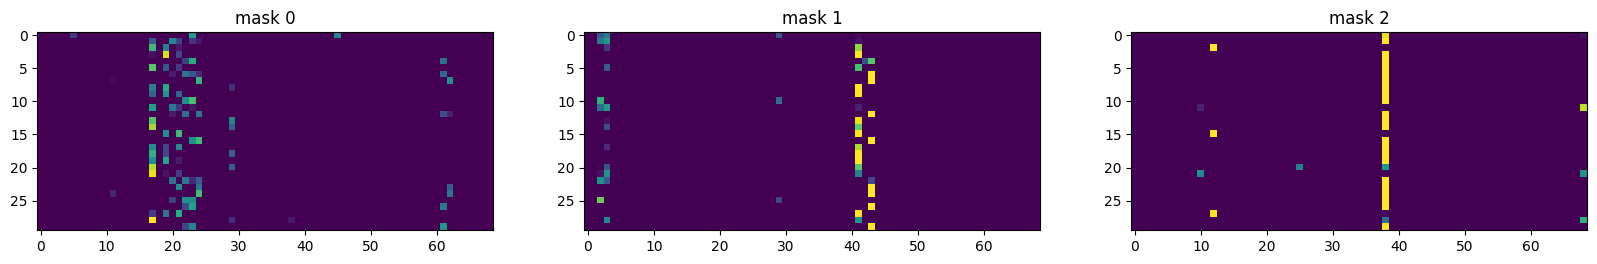

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:30])
    axs[i].set_title(f"mask {i}")